Surfed many sites to get good data


* **Surfed Kaggle for datasets - loading the dataset.**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
phish_data = pd.read_csv('/content/drive/My Drive/code/phishing_sites_urls.csv')

#### * You can download dataset from the **Kaggle** Profile <a href='https://www.kaggle.com/taruntiwarihp/phishing-site-urls'>here</a>

In [ ]:
phish_data.head()

,URL,Label
0,http://www.crestonwood.com/router.php,good
1,http://shadetreetechnology.com/V4/validation/a...,bad
2,https://support-appleld.com.secureupdate.duila...,bad
3,http://rgipt.ac.in,good
4,http://www.iracing.com/tracks/gateway-motorspo...,good


In [ ]:
phish_data.tail()

,URL,Label
11425,http://www.fontspace.com/category/blackletter,good
11426,http://www.budgetbots.com/server.php/Server%20...,bad
11427,https://www.facebook.com/Interactive-Televisio...,good
11428,http://www.mypublicdomainpictures.com/,good
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,bad


In [ ]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     11430 non-null  object
 1   Label   11430 non-null  object
dtypes: object(2)
memory usage: 178.7+ KB


* **About dataset**
* Data is containg 5,49,346 unique entries.
* There are two columns.
* Label column is prediction col which has 2 categories
    A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site.**
    B. Bad - which means the urls contains malicious stuffs and **this site isa Phishing Site.**
* There is no missing value in the dataset.

In [ ]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

* **Since it is classification problems so let's see the classes are balanced or imbalances**

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<Axes: >

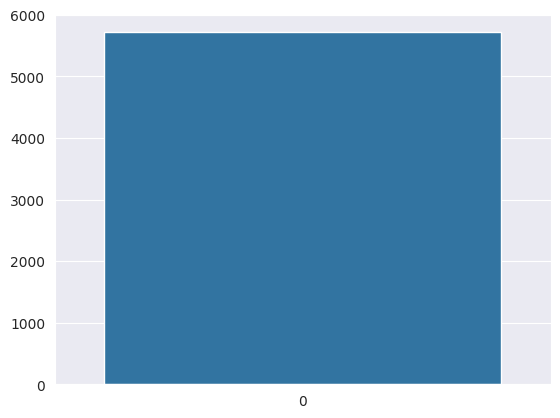

In [ ]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.Label) # - removed index

### Preprocessing

* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.**

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
phish_data.URL[0]

'http://www.crestonwood.com/router.php'

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['http', 'www', 'crestonwood', 'com', 'router', 'php']

In [ ]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.03195527900061279 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
10936,https://www.addtoany.com/,good,"[https, www, addtoany, com]"
9493,https://github.com/mkdoc/mkcli,good,"[https, github, com, mkdoc, mkcli]"
2213,http://www.sooriyanfm.lk/,good,"[http, www, sooriyanfm, lk]"
5402,https://bibliotecabayer.org.ar/wp-admin/inz/att,bad,"[https, bibliotecabayer, org, ar, wp, admin, i..."
5261,http://data.worldbank.org/indicator/EG.ELC.LOS...,good,"[http, data, worldbank, org, indicator, EG, EL..."


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 1.1697900330000266 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
9127,http://domaine-anthesia.com/cs/,bad,"[http, domaine, anthesia, com, cs]","[http, domain, anthesia, com, cs]"
6940,http://paypal-verification.applmanager.com/cus...,bad,"[http, paypal, verification, applmanager, com,...","[http, paypal, verif, applmanag, com, custom, ..."
8166,http://chineshydromechanical.com/,bad,"[http, chineshydromechanical, com]","[http, chineshydromechan, com]"
9936,http://www.eniace.santander.com.mx.servici0seg...,bad,"[http, www, eniace, santander, com, mx, servic...","[http, www, eniac, santand, com, mx, servici, ..."
10666,http://h.23yue.cn/,bad,"[http, h, yue, cn]","[http, h, yue, cn]"


In [ ]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.012998718999369885 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
3800,http://gameplaylabs.com/newuser/fabbc6a1c5734e...,bad,"[http, gameplaylabs, com, newuser, fabbc, a, c...","[http, gameplaylab, com, newus, fabbc, a, c, e...",http gameplaylab com newus fabbc a c ea ca b a
1251,http://623112j4j3.codesandbox.io/pjj/,bad,"[http, j, j, codesandbox, io, pjj]","[http, j, j, codesandbox, io, pjj]",http j j codesandbox io pjj
6136,https://www.drupal.org/node/1785994,good,"[https, www, drupal, org, node]","[https, www, drupal, org, node]",https www drupal org node
3779,https://www.newegg.com/Computer-Memory-Solutio...,good,"[https, www, newegg, com, Computer, Memory, So...","[https, www, newegg, com, comput, memori, solu...",https www newegg com comput memori solut about
2114,http://www.globalsqa.com/,good,"[http, www, globalsqa, com]","[http, www, globalsqa, com]",http www globalsqa com


### Visualization
**1. Visualize some important keys using word cloud**

In [ ]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
1,http://shadetreetechnology.com/V4/validation/a...,bad,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
2,https://support-appleld.com.secureupdate.duila...,bad,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
5,http://appleid.apple.com-app.es/,bad,"[http, appleid, apple, com, app, es]","[http, appleid, appl, com, app, es]",http appleid appl com app es
7,http://www.shadetreetechnology.com/V4/validati...,bad,"[http, www, shadetreetechnology, com, V, valid...","[http, www, shadetreetechnolog, com, v, valid,...",http www shadetreetechnolog com v valid ba b b...
13,http://html.house/l7ceeid6.html,bad,"[http, html, house, l, ceeid, html]","[http, html, hous, l, ceeid, html]",http html hous l ceeid html


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,http://www.crestonwood.com/router.php,good,"[http, www, crestonwood, com, router, php]","[http, www, crestonwood, com, router, php]",http www crestonwood com router php
3,http://rgipt.ac.in,good,"[http, rgipt, ac, in]","[http, rgipt, ac, in]",http rgipt ac in
4,http://www.iracing.com/tracks/gateway-motorspo...,good,"[http, www, iracing, com, tracks, gateway, mot...","[http, www, irac, com, track, gateway, motorsp...",http www irac com track gateway motorsport park
6,http://www.mutuo.it,good,"[http, www, mutuo, it]","[http, www, mutuo, it]",http www mutuo it
8,http://vamoaestudiarmedicina.blogspot.com/,good,"[http, vamoaestudiarmedicina, blogspot, com]","[http, vamoaestudiarmedicina, blogspot, com]",http vamoaestudiarmedicina blogspot com


* create a function to visualize the important keys from url

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud


In [ ]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [ ]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

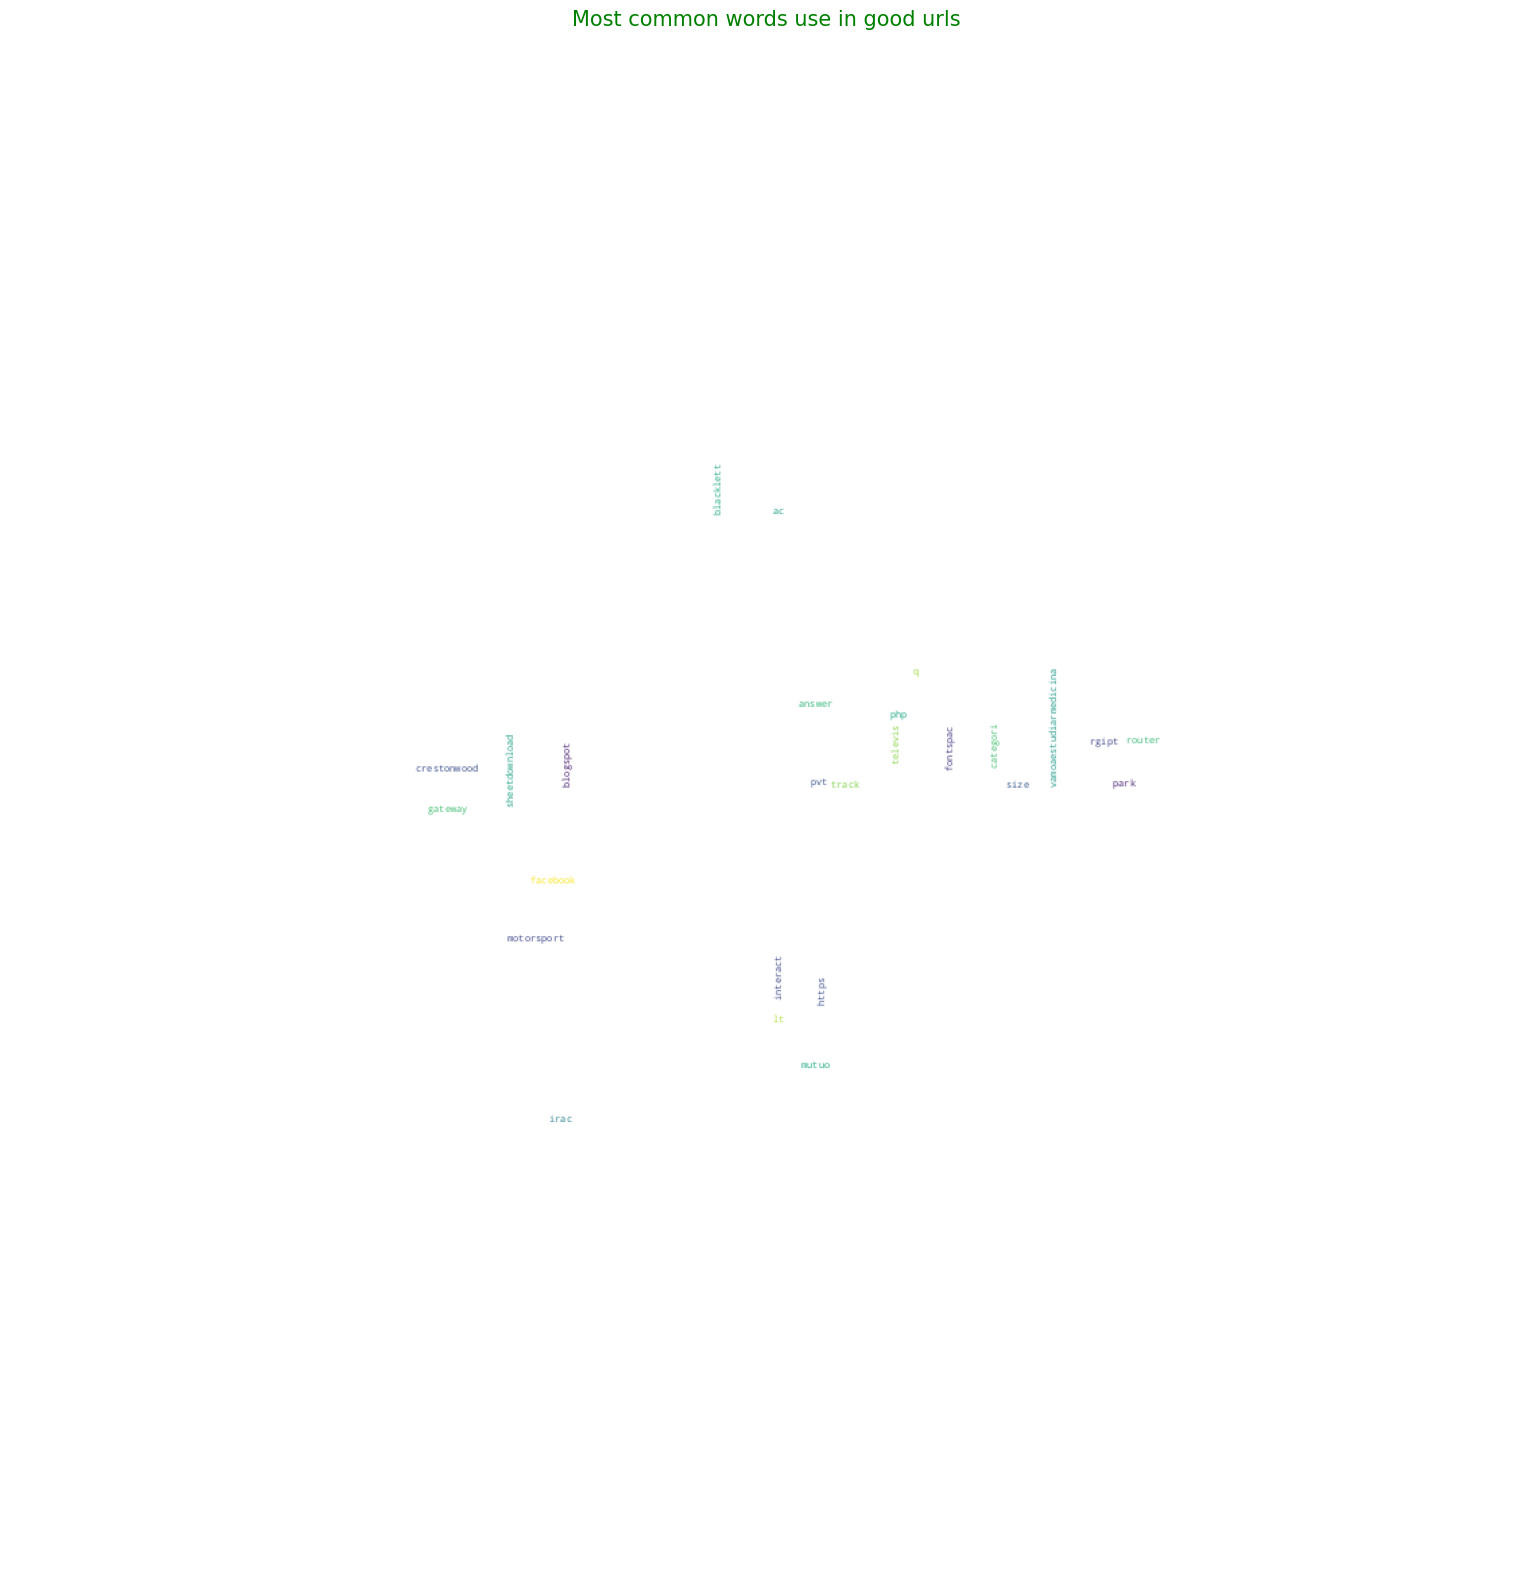

In [ ]:
common_text = str(data)
common_mask = np.array(Image.open('/content/drive/My Drive/code/star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in good urls', title_size=15)

In [ ]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

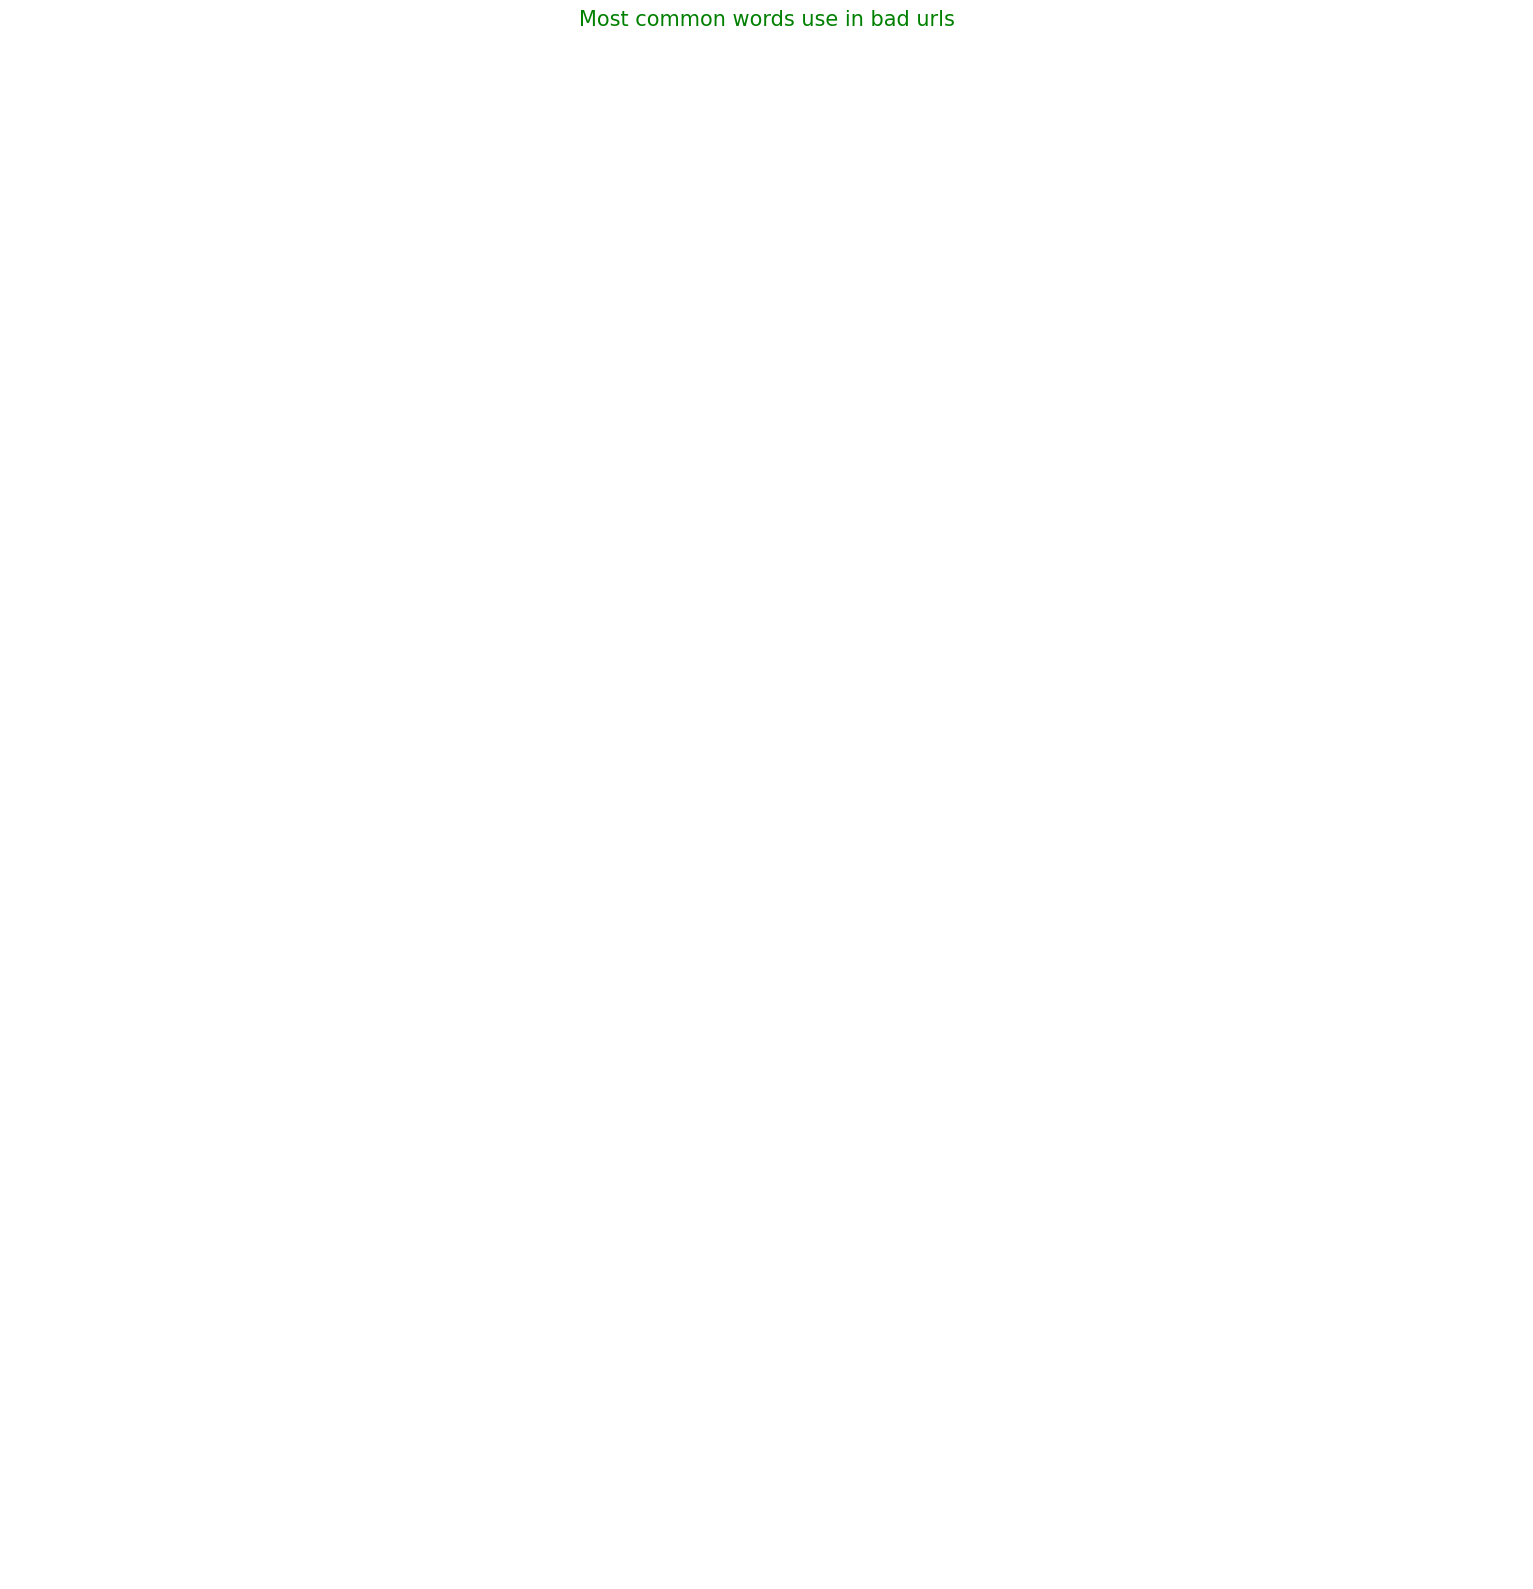

In [ ]:
common_text = str(data)
common_mask = np.array(Image.open('/content/drive/My Drive/code/comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in bad urls', title_size=15)

Download more various type of images <a href='https://github.com/taruntiwarihp/raw_images/tree/master/Words%20cloud%20images'>here</a>

**2. Visualize internal links, it will shows all redirect links.**

#### Scrape any website
* First, setting up the Chrome webdriver so we can scrape dynamic web pages.

#### Chrome webdriver
* WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

url = "https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com"

service = Service("/usr/bin/chromedriver")

options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")

In [ ]:
browser = webdriver.Chrome(service=service, options=options)

# browser.get(url)
# print(browser.title)
# browser.quit()

**You can download chromedriver.exe from my github <a href='https://github.com/taruntiwarihp/dataSets/blob/master/chromedriver_win32.zip'>here</a>**

* After set up the Chrome driver create two lists.
* First list named list_urls holds all the pages you’d like to scrape.
* Second, create an empty list where you’ll append links from each page.


In [ ]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites
links_with_text = []

* I took some phishing site to see were the hackers redirect(on different link) us.
* Use the BeautifulSoup library to extract only relevant hyperlinks for Google, i.e. links only with '<'a'>' tags with href attributes.

#### BeautifulSoup
* It is use for getting data out of HTML, XML, and other markup languages.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
for url in list_urls:
    browser.get(url)
    print(browser.title)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

ezeephones.com - This website is for sale! - ezeephones Resources and Information.
ezeephones.com - This website is for sale! - ezeephones Resources and Information.


#### Turn the URL’s into a Dataframe
* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [ ]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [ ]:
df.head()

,from,to
0,https://www.ezeephones.com/,https://sedo.com/search/details/?partnerid=144...
1,https://www.ezeephones.com/,https://sedo.com/search/details/?partnerid=144...
2,https://www.ezeephones.com/,https://www.sedo.com/services/parking.php3
3,https://www.ezeephones.com/,#
4,https://www.ezeephones.com/about-us,https://sedo.com/search/details/?partnerid=144...


#### Step 3: Draw a graph
* Finally, use the aforementioned DataFrame to **visualize an internal link structure by feeding it to the Networkx method from_pandas_edgelist first** and draw it by calling nx.draw

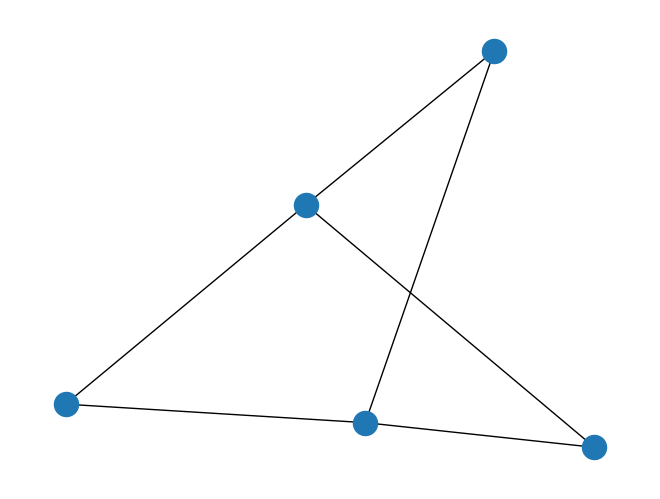

In [ ]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA, with_labels=False)

### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [ ]:
#create cv object
cv = CountVectorizer()

In [ ]:
#help(CountVectorizer())

In [ ]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### * Spliting the data

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
# create lr object
lr = LogisticRegression()

In [ ]:
lr.fit(trainX,trainY)

LogisticRegression()

In [ ]:
lr.score(testX,testY)

0.9128761371588523

.*** Logistic Regression is giving 96% accuracy, Now we will store scores in dict to see which model perform best**

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9647690153989734
Testing Accuracy : 0.9128761371588523

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.92      0.91      1427
        Good       0.92      0.91      0.91      1431

    accuracy                           0.91      2858
   macro avg       0.91      0.91      0.91      2858
weighted avg       0.91      0.91      0.91      2858


CONFUSION MATRIX


<Axes: >

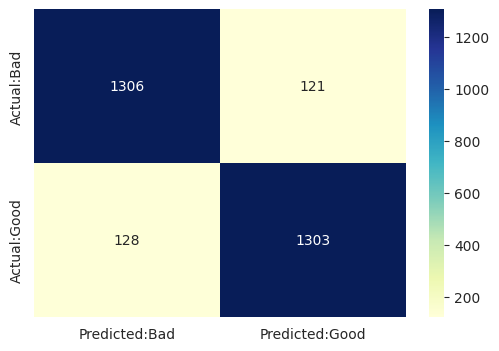

In [ ]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [ ]:
# create mnb object
mnb = MultinomialNB()

In [ ]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [ ]:
mnb.score(testX,testY)

0.9048285514345696

*** MultinomialNB gives us 95% accuracy**  

In [ ]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9644190387307513
Testing Accuracy : 0.9048285514345696

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.86      0.95      0.90      1302
        Good       0.95      0.87      0.91      1556

    accuracy                           0.90      2858
   macro avg       0.90      0.91      0.90      2858
weighted avg       0.91      0.90      0.91      2858


CONFUSION MATRIX


<Axes: >

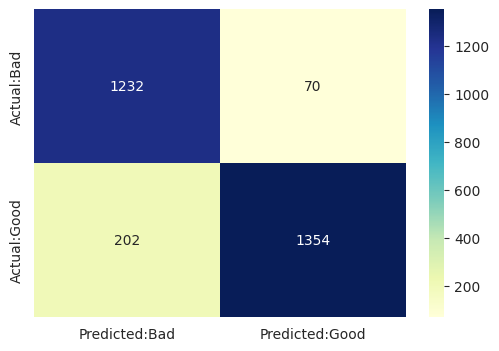

In [ ]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<Axes: >

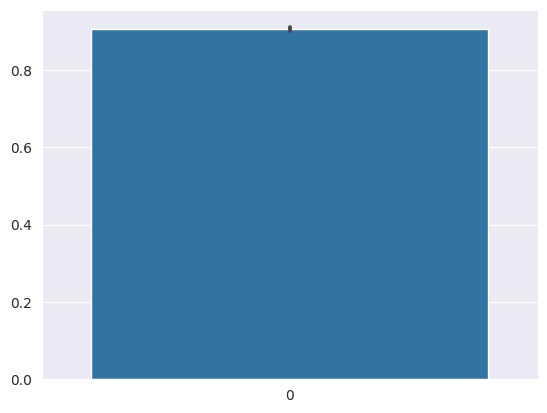

In [ ]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.Accuracy) # - sns.barplot(acc.index,acc.Accuracy)

*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [ ]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray

In [ ]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [ ]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline_ls.score(testX,testY)

0.9142757172848146

Training Accuracy : 0.966518898740084
Testing Accuracy : 0.9142757172848146

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.92      0.91      1394
        Good       0.92      0.91      0.92      1464

    accuracy                           0.91      2858
   macro avg       0.91      0.91      0.91      2858
weighted avg       0.91      0.91      0.91      2858


CONFUSION MATRIX


<Axes: >

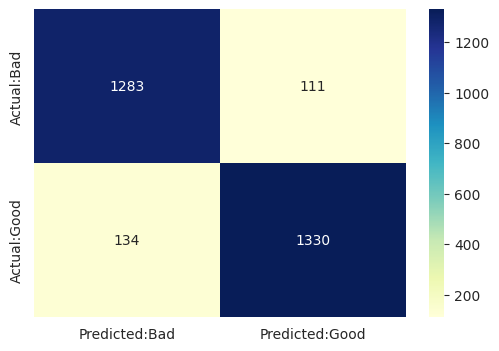

In [ ]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
pickle.dump(pipeline_ls,open('/content/drive/My Drive/code/phishing.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.679146256123163


***That’s it. See, it's that simple yet so effective. We get an accuracy of 98%. That’s a very high value for a machine to be able to detect a malicious URL with. Want to test some links to see if the model gives good predictions? Sure. Let's do it**

In [ ]:
* Bad links => these are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => these are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

SyntaxError: ignored

In [ ]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
predict = ["bankofamerica.com", "paypal.com", "walmart.com", "https://www.bankofamerica.com", "gtbank.com", "mail.google.com"]
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
# predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
result3 = loaded_model.predict(predict)
print(result)
print("*"*30)
print(result2)
print("*"*30)
print(result3)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
******************************
['bad' 'bad' 'good' 'bad' 'good' 'bad']


https://research.aalto.fi/en/datasets/phishstorm-phishing-legitimate-url-dataset